In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [2]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/14_05_2025", exist_ok=True)

# PDF vs CDF
***

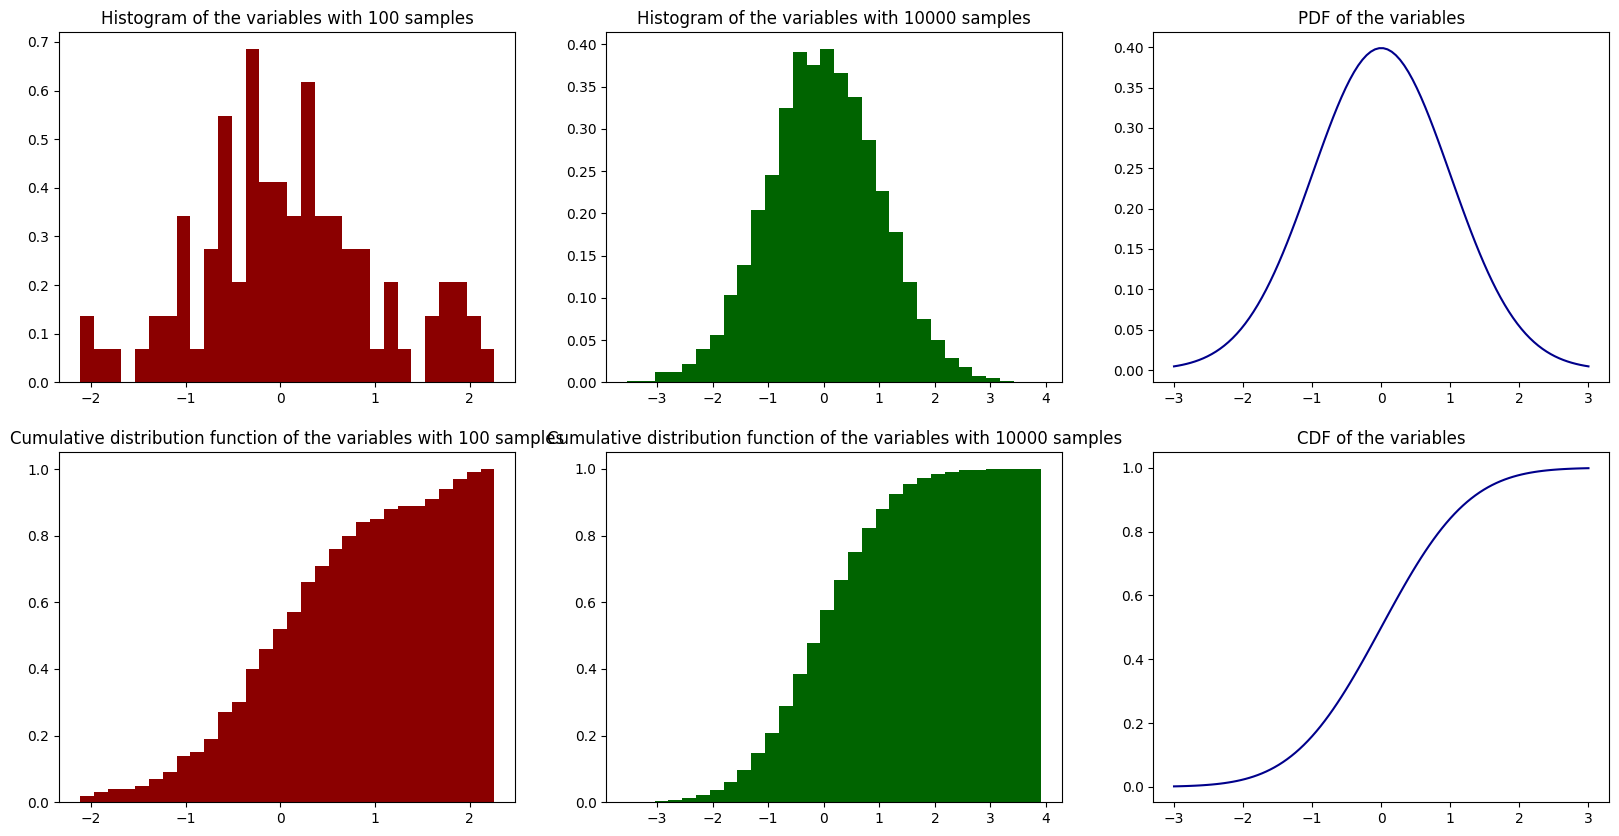

In [3]:
# Normal distribution rvs using scipy
vars_1 = norm.rvs(loc=0, scale=1, size=100)
vars_2 = norm.rvs(loc=0, scale=1, size=10000)

# Histogram of the variables
figsize = (20, 10)
fig, axs = plt.subplots(2, 3, figsize=figsize)
axs[0, 0].hist(vars_1, bins=30, density=True, color = "darkred")
axs[0, 0].set_title("Histogram of the variables with 100 samples")

# Cumulative distribution function of the variables
axs[1, 0].hist(vars_1, bins=30, density=True, cumulative=True, color = "darkred")
axs[1, 0].set_title("Cumulative distribution function of the variables with 100 samples")

# Histogram of the variables
axs[0, 1].hist(vars_2, bins=30, density=True, color = "darkgreen")
axs[0, 1].set_title("Histogram of the variables with 10000 samples")

# Cumulative distribution function of the variables
axs[1, 1].hist(vars_2, bins=30, density=True, cumulative=True, color = "darkgreen")
axs[1, 1].set_title("Cumulative distribution function of the variables with 10000 samples")

# PDF of the variables
x = np.linspace(-3, 3, 100)
pdf = norm.pdf(x, loc=0, scale=1)
axs[0, 2].plot(x, pdf, color = "darkblue")
axs[0, 2].set_title("PDF of the variables")

# CDF of the variables
cdf = norm.cdf(x, loc=0, scale=1)
axs[1, 2].plot(x, cdf, color = "darkblue")
axs[1, 2].set_title("CDF of the variables")
plt.savefig(f"{path}/slides_images/14_05_2025/experimental_normal_distribution.png")
plt.show()



# Central limit theorem experiment
***

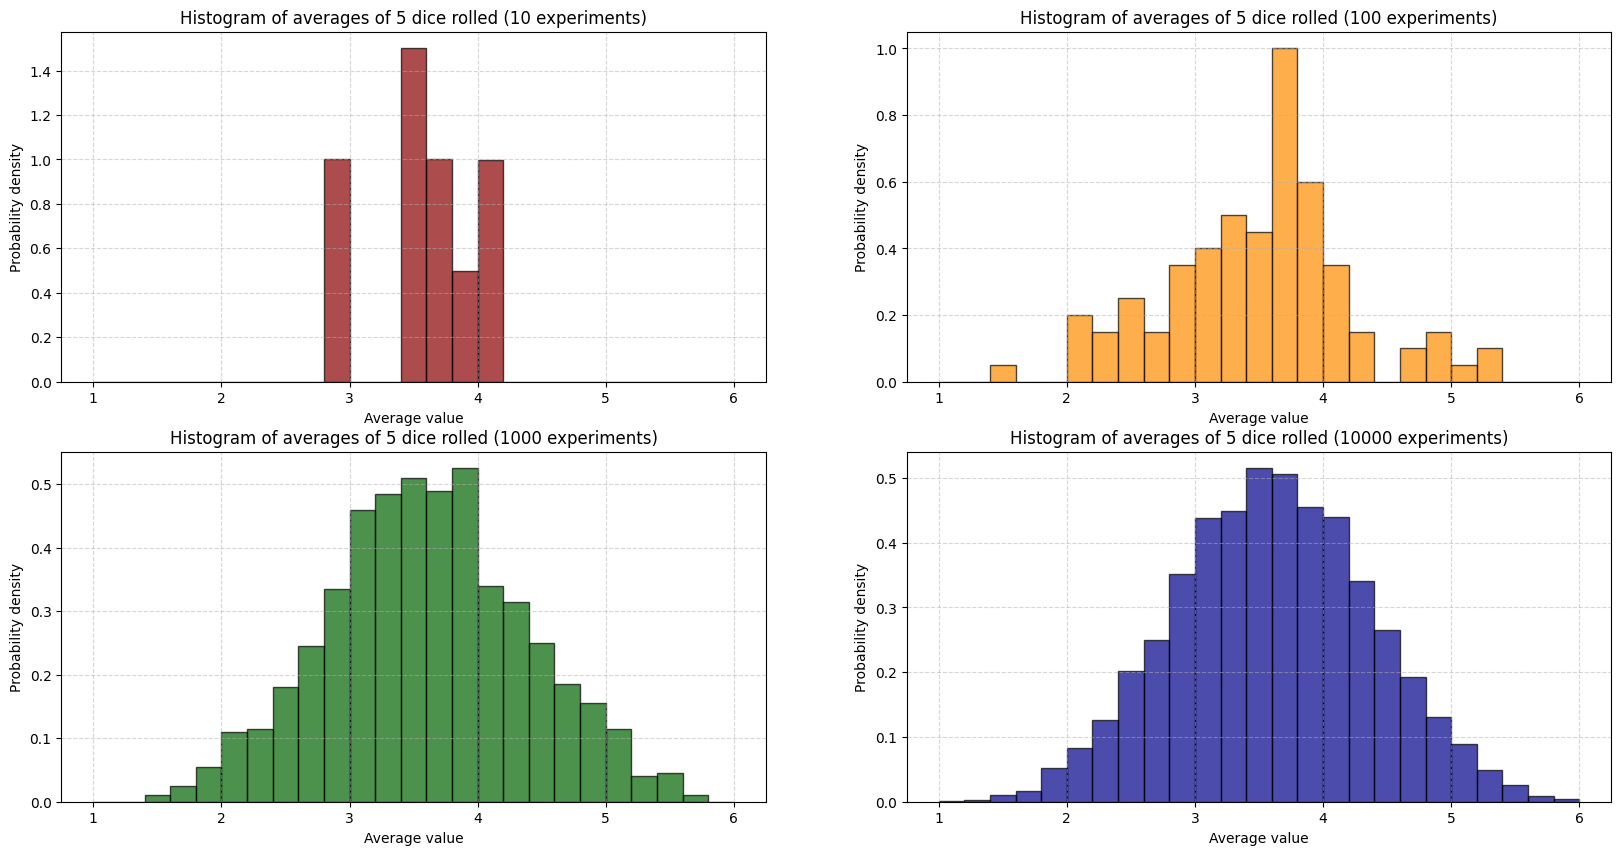

In [4]:
# Parameters
n_dice = 5          # number of dice rolled per experiment
n_experiments = [10, 100, 1000, 10000]  # number of experiments

# Step 1-3: Simulate experiments
averages = []
for n_exp in n_experiments:
    sub_averages = []
    for _ in range(n_exp):
        rolls = np.random.randint(1, 7, size=n_dice)  # roll n_dice dice (values 1-6)
        avg = np.mean(rolls)
        sub_averages.append(avg)
    averages.append(sub_averages)

# Step 4: Plot histogram of averages
figsize = (20, 10)
fig, axs = plt.subplots(2, 2, figsize=figsize)
colors = ['darkred', 'darkorange', 'darkgreen', 'darkblue']
for i, ax in enumerate(axs.flat):
    ax.hist(averages[i], bins=np.arange(1, 6.2, 0.2), density=True, edgecolor='black', alpha=0.7, color=colors[i])
    ax.set_title(f'Histogram of averages of {n_dice} dice rolled ({n_experiments[i]} experiments)')
    ax.set_xlabel('Average value')
    ax.set_ylabel('Probability density')
    ax.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{path}/slides_images/14_05_2025/histogram_of_averages.png')
plt.show()

# Normal distribution
***

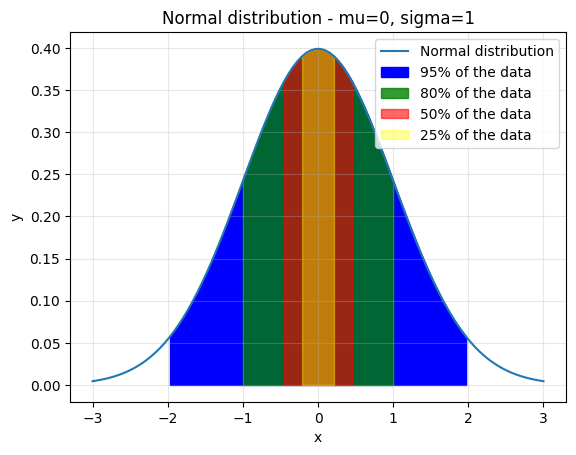

In [5]:
# Normal distribution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-mu)/sigma)**2)
plt.plot(x, y)
# 95% of the data is within 2 standard deviations
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='blue', alpha=1)
plt.fill_between(x, y, where=(x >= mu - 1*sigma) & (x <= mu + 1*sigma), color='green', alpha=0.8)
plt.fill_between(x, y, where=(x >= mu - 0.5*sigma) & (x <= mu + 0.5*sigma), color='red', alpha=0.6)
plt.fill_between(x, y, where=(x >= mu - 0.25*sigma) & (x <= mu + 0.25*sigma), color='yellow', alpha=0.4)
plt.legend(['Normal distribution', '95% of the data', '80% of the data', '50% of the data', '25% of the data'])
plt.title('Normal distribution - mu=0, sigma=1')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig(f'{path}/slides_images/14_05_2025/normal_distribution.png')
plt.show()
plt.close()


# Confidence interval - Normal
***

In [6]:
# Build data set from normal distribution with mean = 12 and std = 6
mu = 12
sigma = 6
n = 1000
x = np.random.normal(mu, sigma, n)

# Save to csv using pandas
pd.DataFrame(x).to_csv(f'{path}/data/normal_ci.csv', index=False)

In [7]:
# Load data
vars = pd.read_csv(f'{path}/data/normal_ci.csv').to_numpy()
sample_mean = vars.mean()
n = len(vars)

# Confidence levels and corresponding z-scores
conf_levels = [0.90, 0.95, 0.99]
z_scores = [norm.ppf(1 - (1 - cl)/2) for cl in conf_levels]

intervals = []
for cl, z in zip(conf_levels, z_scores):
    margin = z * sigma / np.sqrt(n)
    ci = (sample_mean - margin, sample_mean + margin)
    intervals.append((cl, ci))

for cl, ci in intervals:
    print(f"{int(cl*100)}% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")

90% CI: [11.72, 12.34]
95% CI: [11.66, 12.40]
99% CI: [11.54, 12.52]


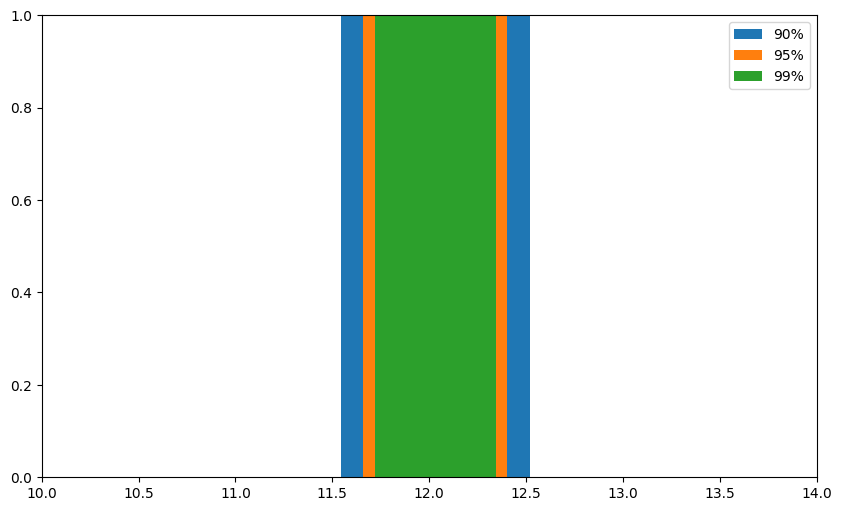

In [8]:
# Visualize the confidence intervals
plt.figure(figsize=(10, 6))
plt.xlim(10, 14)
plt.ylim(0, 1)
for cl, ci in intervals[::-1]:
    plt.fill_between([ci[0], ci[1]], [1,1], alpha=1)
plt.legend([f'{int(cl*100)}%' for cl, _ in intervals])
plt.show()

# Confidence interval - Student's
***

In [9]:
# Build data set from exponential distribution with lmabda = 1/12
lambda_ = 12
n = 1000
x = np.random.exponential(lambda_, n)

# Save to csv using pandas
pd.DataFrame(x).to_csv(f'{path}/data/exponential_ci.csv', index=False)

In [10]:
# Load data
vars = pd.read_csv(f'{path}/data/exponential_ci.csv').to_numpy()
sample_mean = vars.mean()
n = len(vars)
sigma = vars.std()
df = n - 1

# Confidence levels and corresponding z-scores
conf_levels = [0.90, 0.95, 0.99]
z_scores = [stats.t.ppf(1 - (1 - cl)/2, df) for cl in conf_levels]

intervals = []
for cl, z in zip(conf_levels, z_scores):
    margin = z * sigma / np.sqrt(n)
    ci = (sample_mean - margin, sample_mean + margin)
    intervals.append((cl, ci))

for cl, ci in intervals:
    print(f"{int(cl*100)}% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")

90% CI: [11.63, 12.89]
95% CI: [11.51, 13.01]
99% CI: [11.27, 13.24]


# Test hypothesis
***

In [11]:
import numpy as np
from scipy.stats import norm

# Parameters
mu_0 = 70          # Hypothesized population mean
sample_mean = 68.5 # Sample mean
sigma = 3          # Known population standard deviation
n = 30             # Sample size
alpha = 0.05       # Significance level

# Z-test statistic
z = (sample_mean - mu_0) / (sigma / np.sqrt(n))
print(f"Z statistic: {z:.3f}")

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"P-value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Z statistic: -2.739
P-value: 0.0062
Reject the null hypothesis (H0).
